In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
import numpy as np
#import plotly.graph_objects as go
from statsmodels.stats.weightstats import ztest


#df1 = pd.read_csv('C:\Personal\Masters\Masters_work\Study\Y1_S1\HIT140\Assessment_2\HIT_140_Assessment_2_200925\HIT_140_assessment_2\Datasets\cleaned_dataset1.csv')
df2 = pd.read_csv('C:/Users/SWRM/Downloads/dataset2_cleaned_V2.csv')

df2.info()
df2.describe()
df2.head()

# Now we are going to see the number of rows and columns in the dataset
print(f"Dataset 2 dimensions: ") 
print(f"Number of rows: {df2.shape[0]}") 
print(f"Number of columns: {df2.shape[1]}")


# Splitting the DataFrame based on the column 'B'
df2_0 = df2[(df2['month'] == 0)]
df2_1 = df2[(df2['month'] == 1)]
df2_2 = df2[(df2['month'] == 2)]
df2_3 = df2[(df2['month'] == 3)]
df2_4 = df2[(df2['month'] == 4)]
df2_5 = df2[(df2['month'] == 5)]
df2_6 = df2[(df2['month'] == 6)]

lengths = {
    '0': len(df2_0),
    '1': len(df2_1),
    '2': len(df2_2),
    '3': len(df2_3),
    '4': len(df2_4),
    '5': len(df2_5),
    '6': len(df2_6)

}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1897 non-null   object 
 1   month               1897 non-null   int64  
 2   hours_after_sunset  1897 non-null   float64
 3   bat_landing_number  1897 non-null   int64  
 4   food_availability   1897 non-null   float64
 5   rat_minutes         1897 non-null   float64
 6   rat_arrival_number  1897 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 103.9+ KB
Dataset 2 dimensions: 
Number of rows: 1897
Number of columns: 7


In [22]:
import warnings
import scipy.stats as st

# Ignore FutureWarning specifically
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning,)


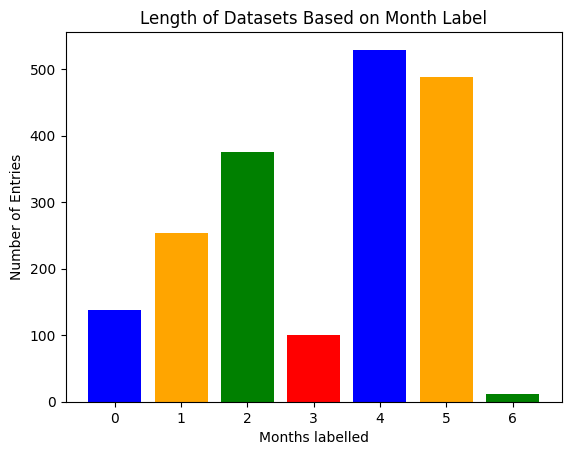

In [ ]:
# Plotting the lengths

plt.bar(lengths.keys(), lengths.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Months labelled')
plt.ylabel('Number of Entries')
plt.title('Length of Datasets Based on Month Label')
plt.show()

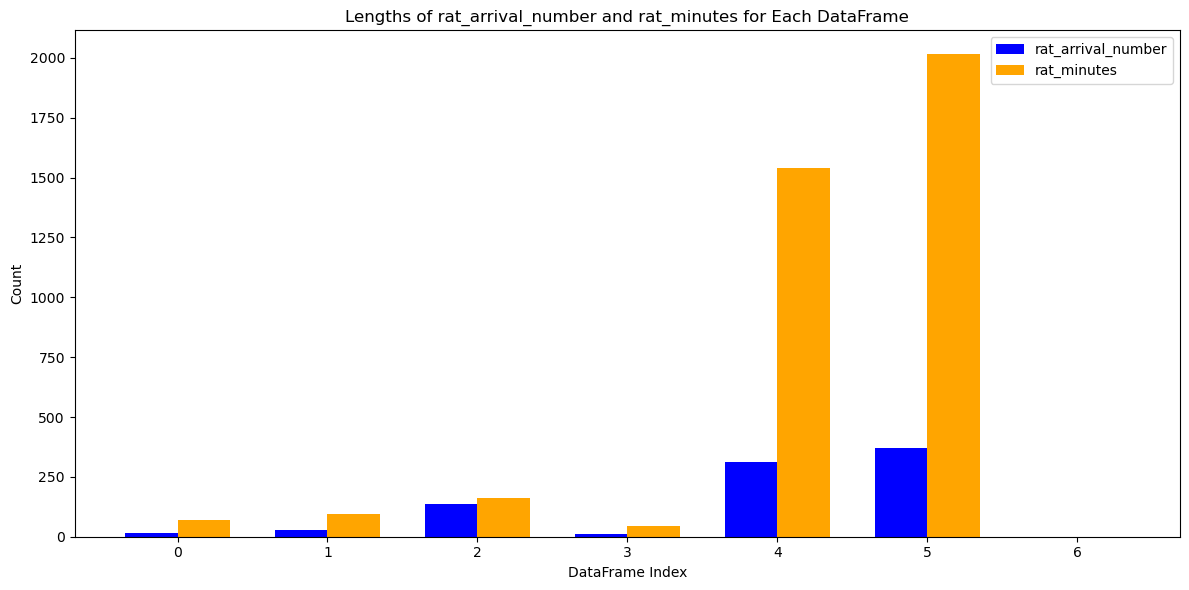

In [8]:
dataset_split_parameter = ['rat_arrival_number', 'rat_minutes']
test_column = ['bat_landing_number', 'food_availability','hours_after_sunset']

#

# List of DataFrames
dataframes = [df2_0, df2_1, df2_2, df2_3, df2_4, df2_5, df2_6]
labels = ['0', '1', '2', '3', '4', '5', '6']

# Prepare data for plotting
rat_arrival_lengths = []
rat_minutes_lengths = []

for df in dataframes:
    rat_arrival_lengths.append(df['rat_arrival_number'].sum())
    rat_minutes_lengths.append(df['rat_minutes'].sum())

# Plotting
x = range(len(labels))  # X-axis positions

plt.figure(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Create bars for 'rat_arrival_number'
plt.bar(x, rat_arrival_lengths, width=bar_width, label='rat_arrival_number', color='blue', align='center')

# Create bars for 'rat_minutes', shifted to the right
plt.bar([p + bar_width for p in x], rat_minutes_lengths, width=bar_width, label='rat_minutes', color='orange', align='center')

# Adding labels and title
plt.xlabel('DataFrame Index')
plt.ylabel('Count')
plt.title('Lengths of rat_arrival_number and rat_minutes for Each DataFrame')
plt.xticks([p + bar_width / 2 for p in x], labels)  # Center the x-ticks
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
print(df2_6['rat_arrival_number'].unique())
print(df2_6['rat_minutes'].unique())


[0]
[0.]


In [13]:
df2_6["time"]

1885    1/06/2018 0:11
1886    1/06/2018 0:41
1887    1/06/2018 1:11
1888    1/06/2018 1:41
1889    1/06/2018 2:11
1890    1/06/2018 2:41
1891    1/06/2018 3:11
1892    1/06/2018 3:41
1893    1/06/2018 4:11
1894    1/06/2018 4:41
1895    1/06/2018 5:11
1896    1/06/2018 5:41
Name: time, dtype: object

Month six only has 12 records of data, which are of the same day from 12 pm to 5pm.

In [ ]:
# List of DataFrames
# dataframes = [df2_0, df2_1, df2_2, df2_3, df2_4, df2_5]
# dataset_split_parameter = ['rat_arrival_number', 'rat_minutes']
# test_column = ['bat_landing_number']
               
#                #, 'food_availability','hours_after_sunset']
# # Loop through each DataFrame
# # Loop through each DataFrame
# # Initialize an empty list to store p-values
# p_values = []

# # Loop through each DataFrame
# for df in dataframes:
#     for x in dataset_split_parameter:
#         for y in test_column:
#             # Converts the x column to integers
#             df[x] = df[x].astype(int)

#             # Creates two dataframes as per the two sections
#             df_above_zero = df[df[x] > 0]
#             df_zero = df[df[x] == 0]

#             # Perform Z-test if both groups have samples
#             if len(df_above_zero) > 0 and len(df_zero) > 0:
#                 z_stats, p_val = ztest(df_above_zero[y], df_zero[y], alternative='two-sided')

#                 # Append the p-value to the list
#                 p_values.append(p_val)

#                 # Determine whether to accept or reject the null hypothesis
#                 conclusion = "We reject the null hypothesis." if p_val < 0.05 else "We accept the null hypothesis."

#                 # Print Z-test statistic, p-value, and conclusion
#                 # print(f"Z-statistic: {z_stats:.2f}, p-value: {p_val:.10f}, Conclusion: {conclusion}")

# # Optionally, print the list of p-values after the loop
# # print("\nList of p-values:", p_values)
                
# # Assuming p_values contains at least 12 values
# # Example p_values for demonstration
# # p_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12]

# # plt.figure(figsize=(10, 6))

# # # Plot the first 6 p-values in red
# # plt.scatter(range(6), p_values[:6], color='red', marker='o', label='rat_arrival_number')

# # # Plot the last 6 p-values in blue
# # plt.scatter(range(6, 12), p_values[6:12], color='blue', marker='o', label='rat_minutes')

# # # Add a horizontal line for the significance level
# # plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')

# # # Title and labels
# # plt.title('Scatter Plot of p-values from Z-tests')
# # plt.xlabel('Test Index')
# # plt.ylabel('p-value')
# # plt.xticks(range(12))  # Set x-ticks to match the number of p-values
# # plt.ylim(0, 1)  # Set y-axis limits
# # plt.legend()
# # plt.grid()
# # plt.show()

# # Create a figure with two subplots
# plt.figure(figsize=(10, 12))

# # First subplot for the first 6 p-values
# plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
# plt.scatter(range(6), p_values[:6], color='red', marker='o', label='rat_arrival_number')
# plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
# plt.title('Scatter Plot of First 6 p-values from Z-tests for Bat_landing_Number')
# plt.xlabel('Test Index')
# plt.ylabel('p-value')
# plt.xticks(range(6))  # Set x-ticks to match the number of p-values
# plt.ylim(0, 1)  # Set y-axis limits
# plt.legend()
# plt.grid()

# # Second subplot for the last 6 p-values
# plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
# plt.scatter(range(6), p_values[6:12], color='blue', marker='o', label='rat_minutes')
# plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
# plt.title('Scatter Plot of Last 6 p-values from Z-tests for Bat_landing_Number')
# plt.xlabel('Test Index')
# plt.ylabel('p-value')
# plt.xticks(range(6))  # Set x-ticks to match the number of p-values
# plt.ylim(0, 1)  # Set y-axis limits
# plt.legend()
# plt.grid()

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

In [16]:
cc=["1","2","3","4","5","6"]
dd=["A","B"]
kk=["O"]
for x in cc:
    for n in dd:
        for z in kk:
            print(f"{x},{n},{z}")

1,A,O
1,B,O
2,A,O
2,B,O
3,A,O
3,B,O
4,A,O
4,B,O
5,A,O
5,B,O
6,A,O
6,B,O


In [39]:
#general hypothesis test of bat fear towards rats
#H0: bats are not scared of rats
#H1: bats are scared of rat
def general_two_sample_hypo(df,x,y):
    df_above_zero = df[df[x] > 0]
    df_zero = df[df[x] == 0]
    z_test_value_general,p_value_test=ztest(df_above_zero[y], df_zero[y], alternative='two-sided')
    if p_value_test >=0.05:
        print("Bats are scared of rats")
    else:
        print("Bats are scared of rats")       
    

In [41]:
for n in['rat_arrival_number', 'rat_minutes']:
    for x in ['bat_landing_number', 'food_availability','hours_after_sunset']:
        print(f"Hypothesis result for {n} with {x}")
        general_two_sample_hypo(df2,n,x)
        print("---------------------------")

Hypothesis result for rat_arrival_number with bat_landing_number
Bats are scared of rats
---------------------------
Hypothesis result for rat_arrival_number with food_availability
Bats are scared of rats
---------------------------
Hypothesis result for rat_arrival_number with hours_after_sunset
Bats are scared of rats
---------------------------
Hypothesis result for rat_minutes with bat_landing_number
Bats are scared of rats
---------------------------
Hypothesis result for rat_minutes with food_availability
Bats are scared of rats
---------------------------
Hypothesis result for rat_minutes with hours_after_sunset
Bats are scared of rats
---------------------------


## As per part one of this assessment, Bats are scared of rats.

In [32]:

def p_value_grapher(dataframes,dataset_split_parameter,test_column):
    
                   
                   #, 'food_availability','hours_after_sunset']
    # Loop through each DataFrame
    # Loop through each DataFrame
    # Initialize an empty list to store p-values
    p_values = []
    
    # Loop through each DataFrame
    for df in dataframes:
        for x in dataset_split_parameter:
            for y in test_column:
                # Converts the x column to integers
                df=df.copy()
                df[x] = df[x].astype(int)
    
                # Creates two dataframes as per the two sections
                df_above_zero = df[df[x] > 0]
                df_zero = df[df[x] == 0]
    
                # Perform Z-test if both groups have samples
                if len(df_above_zero) >= 30 and len(df_zero) >= 30:
                    z_stats, p_val = ztest(df_above_zero[y], df_zero[y], alternative='two-sided')
    
                    # Append the p-value to the list
                    p_values.append(p_val)
    
                    # Determine whether to accept or reject the null hypothesis
                    conclusion = "We reject the null hypothesis." if p_val < 0.05 else "We accept the null hypothesis."
                else:
                    t_stats, p_val = st.ttest_ind(a=df_above_zero[y], b=df_zero[y],equal_var=False, alternative='two-sided')
    
                    # Append the p-value to the list
                    p_values.append(p_val)
    
                    # Determine whether to accept or reject the null hypothesis
                    conclusion = "We reject the null hypothesis." if p_val < 0.05 else "We accept the null hypothesis."
                    
    
                    # Print Z-test statistic, p-value, and conclusion
                    # print(f"Z-statistic: {z_stats:.2f}, p-value: {p_val:.10f}, Conclusion: {conclusion}")
    
    # Optionally, print the list of p-values after the loop
    # print("\nList of p-values:", p_values)
                    
    # Assuming p_values contains at least 12 values
    # Example p_values for demonstration
    # p_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12]
    
    # plt.figure(figsize=(10, 6))
    
    # # Plot the first 6 p-values in red
    # plt.scatter(range(6), p_values[:6], color='red', marker='o', label='rat_arrival_number')
    
    # # Plot the last 6 p-values in blue
    # plt.scatter(range(6, 12), p_values[6:12], color='blue', marker='o', label='rat_minutes')
    
    # # Add a horizontal line for the significance level
    # plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
    
    # # Title and labels
    # plt.title('Scatter Plot of p-values from Z-tests')
    # plt.xlabel('Test Index')
    # plt.ylabel('p-value')
    # plt.xticks(range(12))  # Set x-ticks to match the number of p-values
    # plt.ylim(0, 1)  # Set y-axis limits
    # plt.legend()
    # plt.grid()
    # plt.show()
    
    # Create a figure with two subplots
    rat_arrival_number_p_value_list=[]
    rat_minutes_p_value_list=[]
    for i in [0,2,4,6,8,10]:
        rat_arrival_number_p_value_list.append(p_values[i])
    for s in [1,3,5,6,9,11]:
        rat_minutes_p_value_list.append(p_values[s])    
        
    plt.figure(figsize=(10, 12))
    
    # First subplot for the first 6 p-values
    plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
    plt.scatter(x=range(6), y=rat_arrival_number_p_value_list, color='red', marker='o', label='rat_arrival_number')
    plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
    plt.title('Scatter Plot of First 6 p-values from Z-tests for Bat_landing_Number')
    plt.xlabel('Test Index')
    plt.ylabel('p-value')
    plt.xticks(range(6))  # Set x-ticks to match the number of p-values
    plt.ylim(0, 1)  # Set y-axis limits
    plt.legend()
    plt.grid()
    
    # Second subplot for the last 6 p-values
    plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
    plt.scatter(x=range(6), y=rat_minutes_p_value_list, color='blue', marker='o', label='rat_minutes')
    plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
    plt.title('Scatter Plot of Last 6 p-values from Z-tests for Bat_landing_Number')
    plt.xlabel('Test Index')
    plt.ylabel('p-value')
    plt.xticks(range(6))  # Set x-ticks to match the number of p-values
    plt.ylim(0, 1)  # Set y-axis limits
    plt.legend()
    plt.grid()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

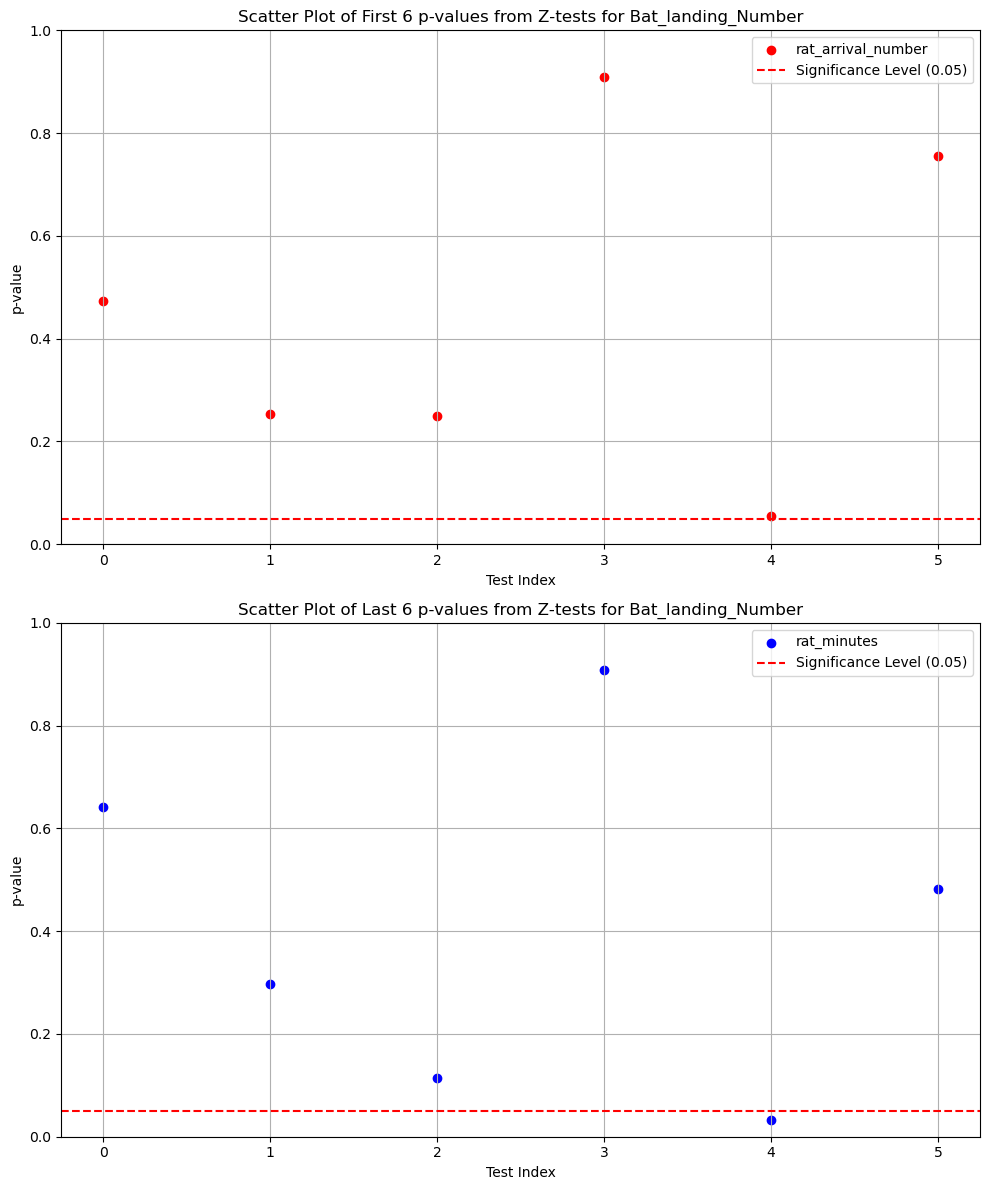

In [36]:
#for bat landing number
p_value_grapher([df2_0, df2_1, df2_2, df2_3, df2_4, df2_5],['rat_arrival_number', 'rat_minutes'],['bat_landing_number'])

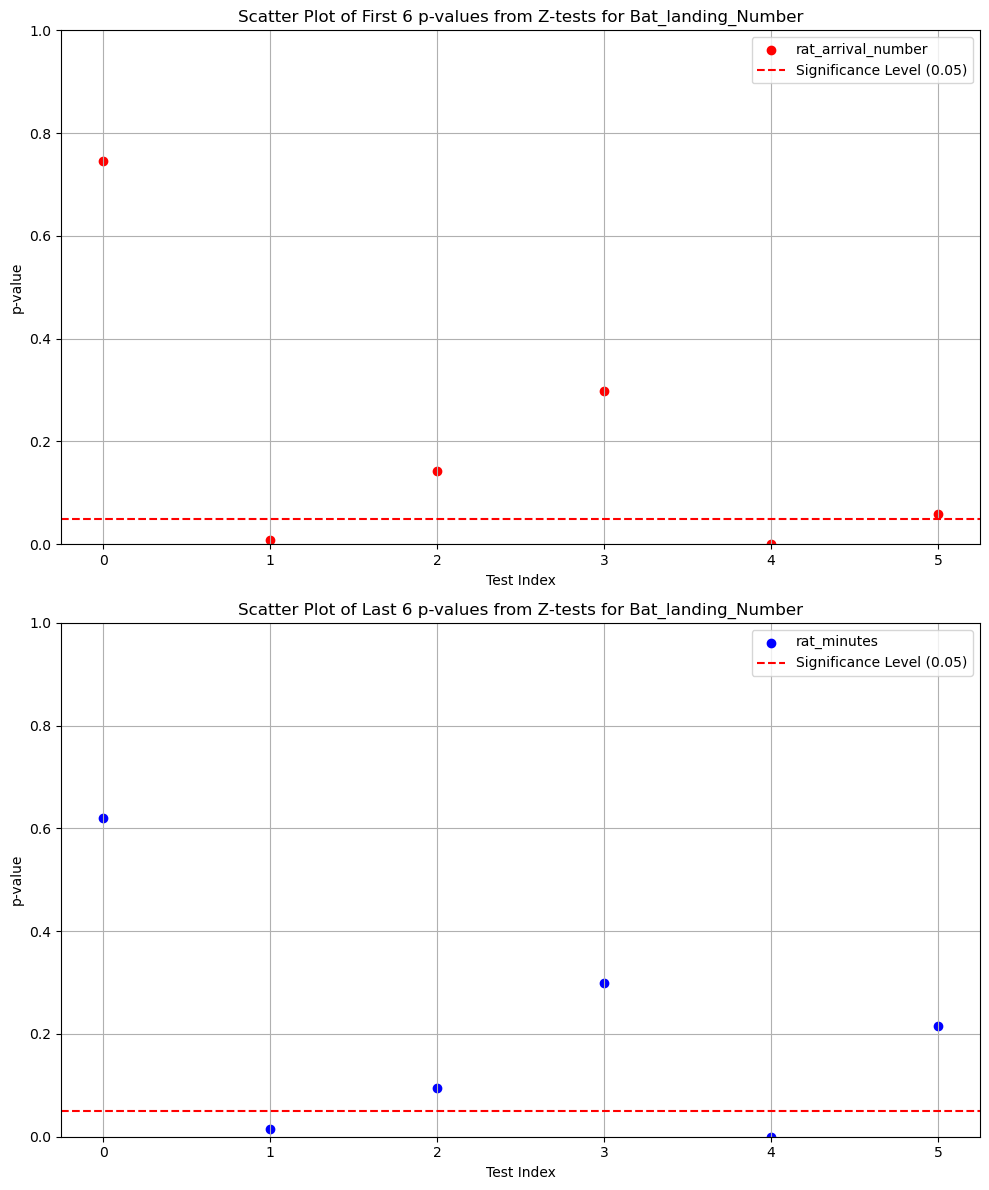

In [37]:
#for food availability
p_value_grapher([df2_0, df2_1, df2_2, df2_3, df2_4, df2_5],['rat_arrival_number', 'rat_minutes'],['food_availability'])

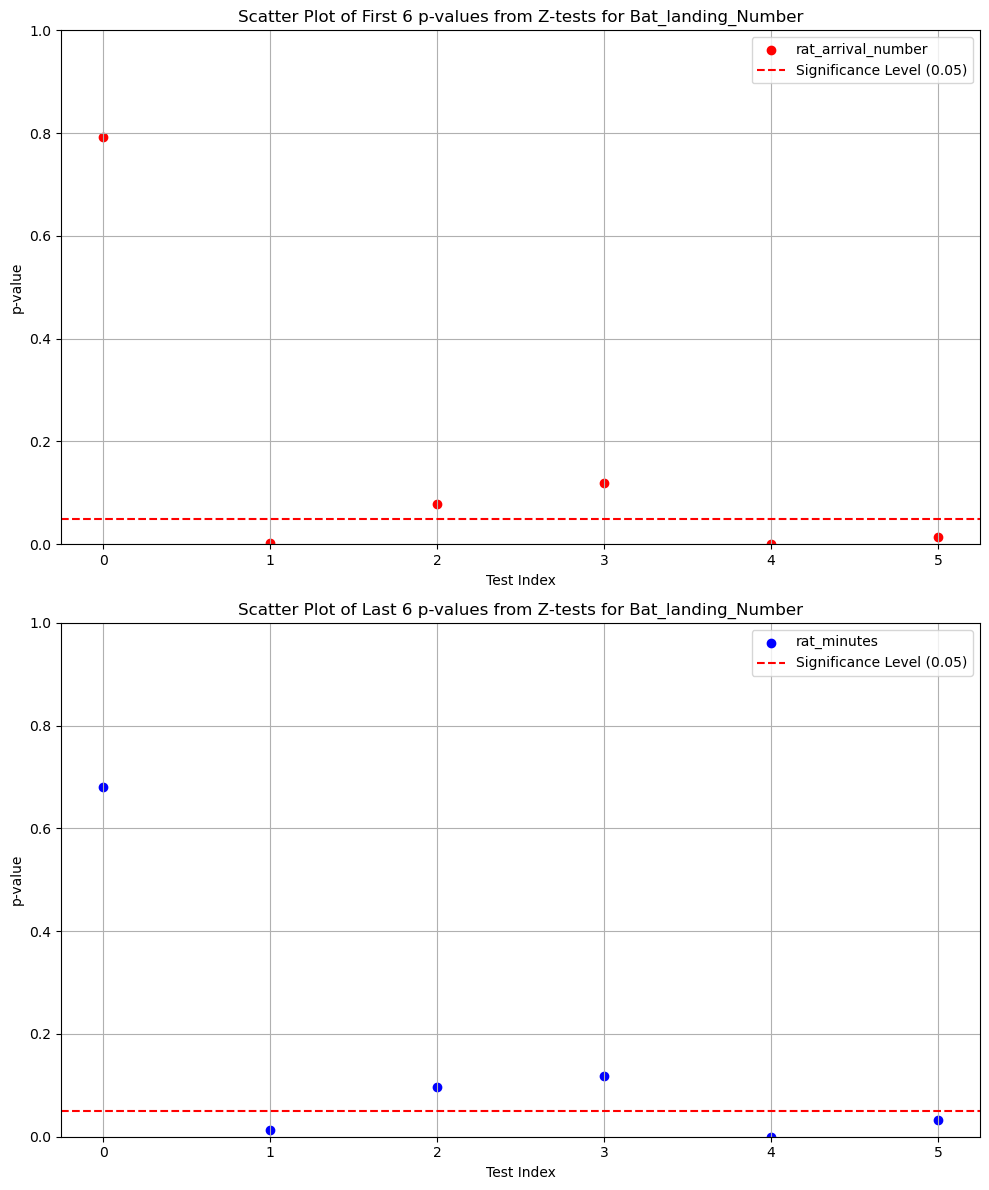

In [38]:
# for food availability
p_value_grapher([df2_0, df2_1, df2_2, df2_3, df2_4, df2_5],['rat_arrival_number', 'rat_minutes'],['hours_after_sunset'])